In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [49]:
#Read data
# Load data
df = pd.read_csv('../data/raw/predictive_maintenance.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (10000, 10)

First 5 rows:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [36]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [37]:
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [38]:

df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [39]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

Missing Values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Data Types:
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object


In [40]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


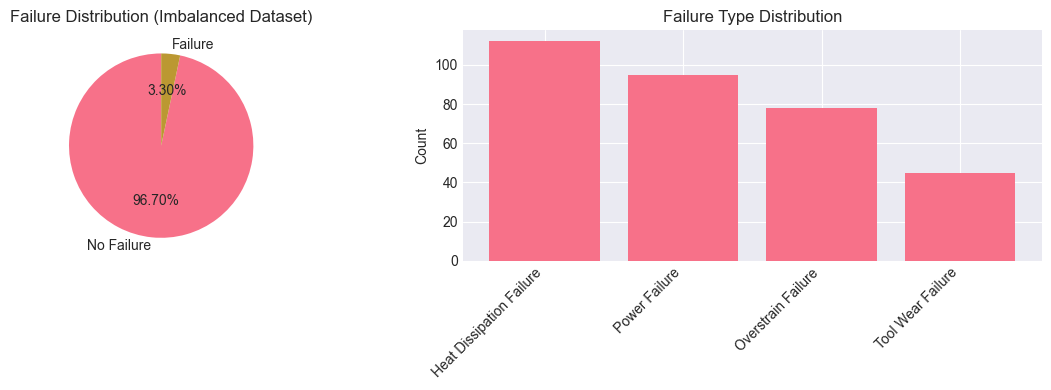

Failure Rate: 3.30%
Class Imbalance Ratio: 1:29


In [53]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Binary target
target_counts = df['Target'].value_counts()
axes[0].pie(target_counts.values, labels=['No Failure', 'Failure'], 
            autopct='%1.2f%%', startangle=90)
axes[0].set_title('Failure Distribution (Imbalanced Dataset)')

# Failure types
failure_counts = df[df['Target']==1]['Failure Type'].value_counts()
axes[1].bar(range(len(failure_counts)), failure_counts.values)
axes[1].set_xticks(range(len(failure_counts)))
axes[1].set_xticklabels(failure_counts.index, rotation=45, ha='right')
axes[1].set_title('Failure Type Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print(f"Failure Rate: {df['Target'].mean()*100:.2f}%")
print(f"Class Imbalance Ratio: 1:{int(target_counts[0]/target_counts[1])}")

In [42]:
df_failure = df[df['Target'] == 1]
df_no_failure = df[df['Target'] == 0]

In [43]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [52]:
df = df[~((df['Target'] == 1) & (df['Failure Type'] == 'No Failure'))]


In [54]:
# Numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 
                     'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Statistical summary
df[numerical_features].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,300.004634,310.005385,1538.804124,39.985377,107.942648
std,2.000300,1.483990,179.321027,9.969029,63.656648
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


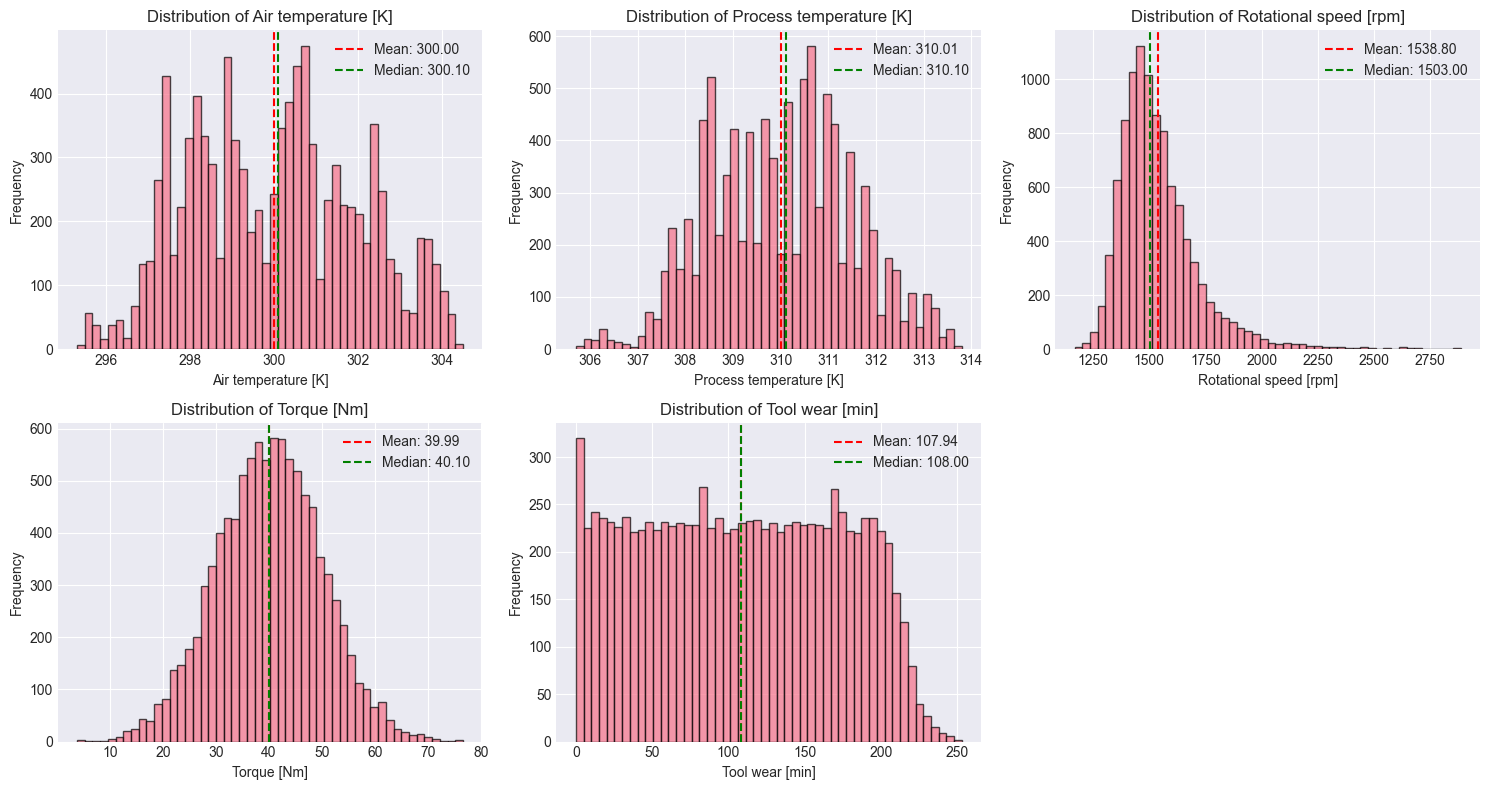

In [55]:
# Distribution plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', 
                     label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', 
                     label=f'Median: {df[col].median():.2f}')
    axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()

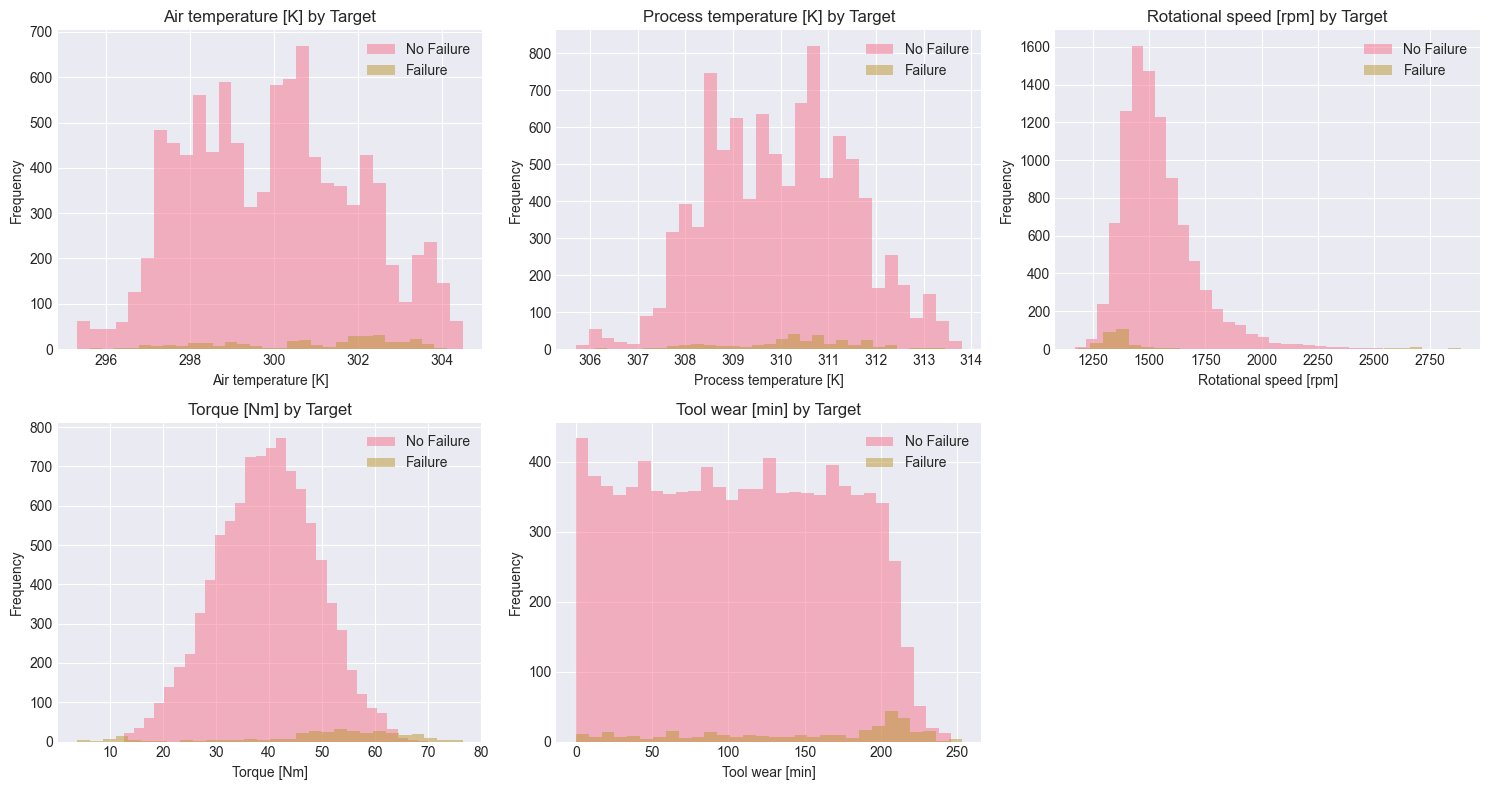

In [56]:
# Compare distributions for failed vs non-failed
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    for target in [0, 1]:
        subset = df[df['Target'] == target][col]
        axes[idx].hist(subset, bins=30, alpha=0.5, 
                      label=f'{"Failure" if target else "No Failure"}')
    
    axes[idx].set_title(f'{col} by Target')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

axes[-1].axis('off')
plt.tight_layout()
plt.show()

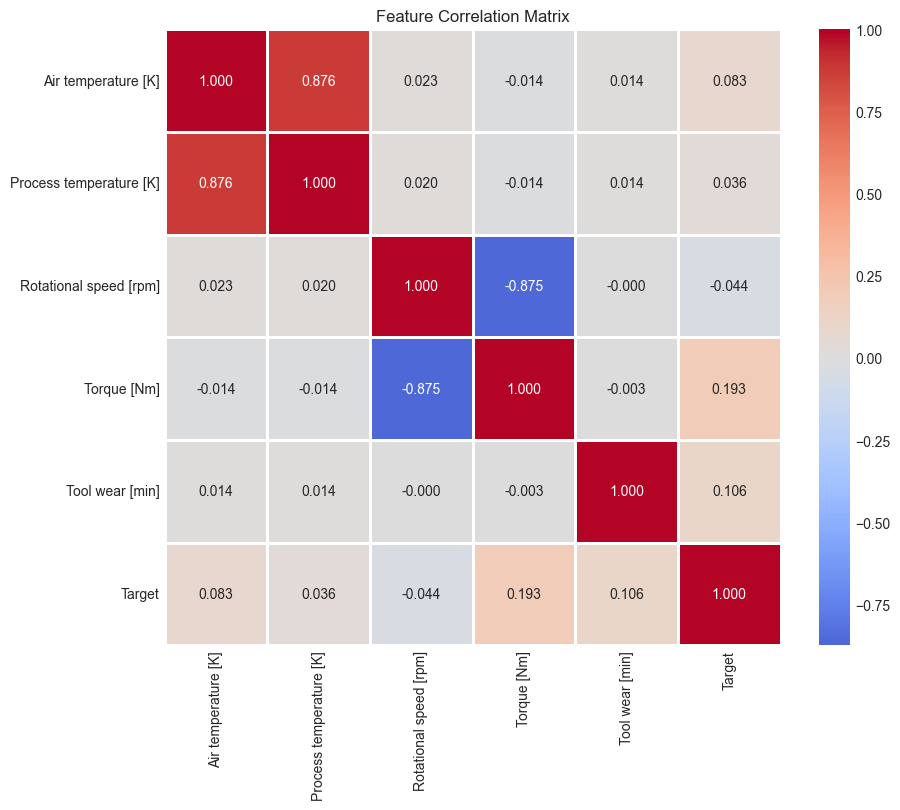

In [57]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ['Target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.3f')
plt.title('Feature Correlation Matrix')
plt.show()

In [58]:
# Create new features
df['Temperature Difference [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Power [W]'] = (df['Torque [Nm]'] * df['Rotational speed [rpm]'] * 2 * np.pi) / 60
df['Tool Wear Rate'] = df['Tool wear [min]'] / df['UDI']  # Wear per unit produced

# Categorize tool wear
df['Tool Wear Category'] = pd.cut(df['Tool wear [min]'], 
                                  bins=[0, 50, 150, 300],
                                  labels=['Low', 'Medium', 'High'])

print("New Features Created:")
print(df[['Temperature Difference [K]', 'Power [W]', 'Tool Wear Rate', 
          'Tool Wear Category']].head())

New Features Created:
   Temperature Difference [K]    Power [W]  Tool Wear Rate Tool Wear Category
0                        10.5  6951.590560        0.000000                NaN
1                        10.5  6826.722724        1.500000                Low
2                        10.4  7749.387543        1.666667                Low
3                        10.4  5927.504659        1.750000                Low
4                        10.5  5897.816608        1.800000                Low


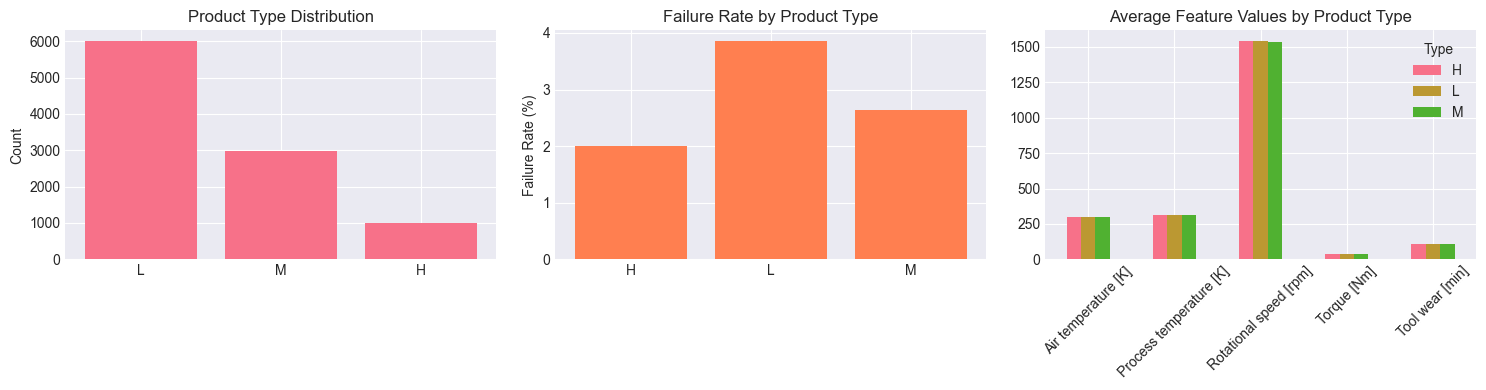

In [59]:
# Product type distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Product type counts
type_counts = df['Type'].value_counts()
axes[0].bar(type_counts.index, type_counts.values)
axes[0].set_title('Product Type Distribution')
axes[0].set_ylabel('Count')

# Failure rate by product type
failure_by_type = df.groupby('Type')['Target'].mean() * 100
axes[1].bar(failure_by_type.index, failure_by_type.values, color='coral')
axes[1].set_title('Failure Rate by Product Type')
axes[1].set_ylabel('Failure Rate (%)')

# Average features by product type
type_features = df.groupby('Type')[numerical_features].mean()
type_features.T.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Feature Values by Product Type')
axes[2].legend(title='Type')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Number of outliers detected: 178
Percentage of outliers: 1.78%


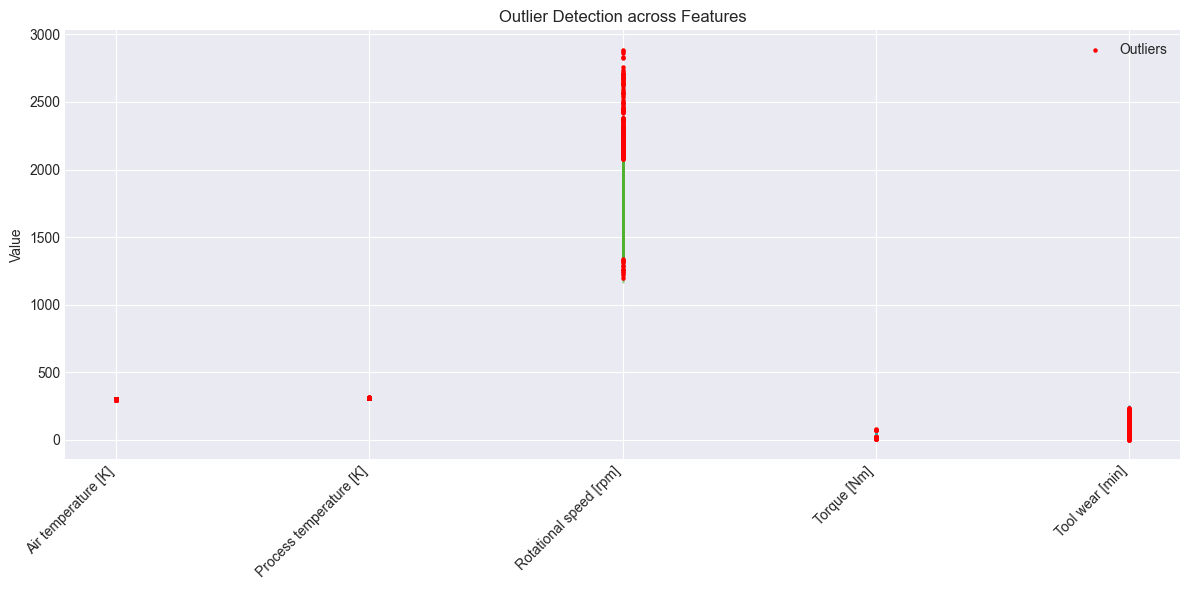

In [60]:
from scipy import stats

# Z-score based outlier detection
z_scores = np.abs(stats.zscore(df[numerical_features]))
outliers = (z_scores > 3).any(axis=1)

print(f"Number of outliers detected: {outliers.sum()}")
print(f"Percentage of outliers: {outliers.sum()/len(df)*100:.2f}%")

# Visualize outliers
fig, ax = plt.subplots(figsize=(12, 6))
for idx, col in enumerate(numerical_features):
    ax.scatter([idx]*len(df), df[col], alpha=0.3, s=1)
    ax.scatter([idx]*outliers.sum(), df.loc[outliers, col], 
              color='red', s=5, label='Outliers' if idx == 0 else '')

ax.set_xticks(range(len(numerical_features)))
ax.set_xticklabels(numerical_features, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('Outlier Detection across Features')
ax.legend()
plt.tight_layout()
plt.show()

In [61]:
# Summary statistics for modeling
print("="*50)
print("DATASET SUMMARY FOR MLOPS PIPELINE")
print("="*50)
print(f"Total Samples: {len(df)}")
print(f"Features: {len(numerical_features)} numerical + categorical")
print(f"Target Imbalance: {target_counts[1]}/{len(df)} ({df['Target'].mean()*100:.2f}% failure)")
print(f"Failure Types: {df[df['Target']==1]['Failure Type'].nunique()}")
print("\nFeature Ranges:")
for col in numerical_features:
    print(f"  {col}: [{df[col].min():.2f}, {df[col].max():.2f}]")

print("\n" + "="*50)
print("RECOMMENDATIONS FOR MLOPS PIPELINE")
print("="*50)
print("1. Implement SMOTE or class weighting for imbalance")
print("2. Create separate models for each product type")
print("3. Monitor temperature difference as key feature")
print("4. Set up drift detection on tool wear patterns")
print("5. Use stratified sampling for train/test splits")

DATASET SUMMARY FOR MLOPS PIPELINE
Total Samples: 9991
Features: 5 numerical + categorical
Target Imbalance: 330/9991 (3.30% failure)
Failure Types: 4

Feature Ranges:
  Air temperature [K]: [295.30, 304.50]
  Process temperature [K]: [305.70, 313.80]
  Rotational speed [rpm]: [1168.00, 2886.00]
  Torque [Nm]: [3.80, 76.60]
  Tool wear [min]: [0.00, 253.00]

RECOMMENDATIONS FOR MLOPS PIPELINE
1. Implement SMOTE or class weighting for imbalance
2. Create separate models for each product type
3. Monitor temperature difference as key feature
4. Set up drift detection on tool wear patterns
5. Use stratified sampling for train/test splits


In [62]:
# Prepare data for pipeline
# Select features for modeling
feature_columns = numerical_features + ['Temperature Difference [K]', 'Power [W]', 
                                        'Tool Wear Rate']
target_column = 'Target'

# Encode product type
df_processed = df.copy()
df_processed['Type_L'] = (df_processed['Type'] == 'L').astype(int)
df_processed['Type_M'] = (df_processed['Type'] == 'M').astype(int)
df_processed['Type_H'] = (df_processed['Type'] == 'H').astype(int)

# Save processed data
df_processed.to_csv('../data/processed/data_processed.csv', index=False)
print("Processed data saved to ../data/processed/data_processed.csv")

# Create train/test split for initial modeling
X = df_processed[feature_columns + ['Type_L', 'Type_M', 'Type_H']]
y = df_processed[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Train failure rate: {y_train.mean()*100:.2f}%")
print(f"Test failure rate: {y_test.mean()*100:.2f}%")

Processed data saved to ../data/processed/data_processed.csv

Train set size: 7992
Test set size: 1999
Train failure rate: 3.30%
Test failure rate: 3.30%
